# Project 4: West Nile Virus prediction
#### Ivan Tan, Andy Chan, Jeremy Tan, Gan Hong Yee DSI-17 Singapore
#### 15 October 2020

# 3 EDA

## Contents
1. [Dataframe Preparation](#Dataframe-Preparation)
2. [Summary Statistics](#Summary-Statistics)
3. [Further EDA](#Further-EDA)
4. [Plot GeoMap](#Plot-Geo-map)
5. [Spray Effectiveness](#Examining-the-Effectiveness-of-Spraying-Pesticides-on-Number-of-Mosquitoes)
6. [Weather vs Mosquitos](#Examining-Relationship-Between-Weather-and-Number-of-Mosquito)

## Setup
### Libraries

please install the following dependencies:
1. pip install Shapely
2. pip install geopandas
3. pip install descartes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd 
from shapely.geometry import Point, Polygon
import seaborn as sns
plt.style.use('seaborn')
import datetime

## Dataframe Preparation

In [2]:
# import all the dataframes for EDA
train_df = pd.read_csv("../datasets/cleaned_datasets/train_df_cleaned.csv")
spray_df = pd.read_csv("../datasets/cleaned_datasets/spray_df_cleaned.csv")
weather_df = pd.read_csv("../datasets/cleaned_datasets/weather_cleaned.csv")

In [3]:
# combine dataframe of train and weather, by date and station
combined_df = train_df.merge(weather_df, how='left', on=['Date','Station'])

In [4]:
combined_df.drop(columns= ['Unnamed: 0_x','Unnamed: 0_y', 'year', 'month', 'day'], inplace = True)

**Convert Dates into Week of the Month**

In [59]:
def date_to_week(date):
    '''
    Description:
    Converts date string to int week of the year
    ---
    Params:

    - date: (str) date string yyyy-mm--dd
    ---
    Returns:

    - (int) week of the year
    '''
    datelist = date.split('-')
    return datetime.date(int(datelist[0]), int(datelist[1]), int(datelist[2])).isocalendar()[1]


In [6]:
combined_df['Week'] = combined_df['Date'].map(date_to_week)

In [7]:
combined_df.info()

# no null values, merge successful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 8609
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    8610 non-null   object 
 1   Address                 8610 non-null   object 
 2   Species                 8610 non-null   object 
 3   Block                   8610 non-null   int64  
 4   Street                  8610 non-null   object 
 5   Trap                    8610 non-null   object 
 6   AddressNumberAndStreet  8610 non-null   object 
 7   Latitude                8610 non-null   float64
 8   Longitude               8610 non-null   float64
 9   AddressAccuracy         8610 non-null   int64  
 10  WnvPresent              8610 non-null   int64  
 11  NumMosquitos            8610 non-null   int64  
 12  Day                     8610 non-null   int64  
 13  Month                   8610 non-null   int64  
 14  Year                    8610 non-null   

In [8]:
# look through the columns
combined_df.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'WnvPresent', 'NumMosquitos', 'Day', 'Month', 'Year', 'Station', 'Tmax',
       'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise',
       'Sunset', 'CodeSum', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Week'],
      dtype='object')

In [9]:
# quick examination of the dataframe
combined_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Week
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,421,1917,BR HZ,0.0,29.44,30.09,5.8,16,7.4,22
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,421,1917,BR HZ,0.0,29.44,30.09,5.8,16,7.4,22
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,...,421,1917,BR HZ,0.0,29.44,30.09,5.8,16,7.4,22
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,...,421,1917,BR HZ,0.0,29.44,30.09,5.8,16,7.4,22
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,...,421,1917,BR HZ,0.0,29.44,30.09,5.8,16,7.4,22


## Summary Statistics

In [10]:
combined_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Block,8610.0,38.793380,24.129378,10.000000,14.000000,37.000000,58.000000,98.000000
Latitude,8610.0,41.844422,0.107076,41.644612,41.750498,41.857402,41.944869,42.017430
Longitude,8610.0,-87.695237,0.084921,-87.930995,-87.752411,-87.694991,-87.642984,-87.531635
AddressAccuracy,8610.0,7.936121,1.326695,3.000000,8.000000,8.000000,9.000000,9.000000
WnvPresent,8610.0,0.053078,0.224202,0.000000,0.000000,0.000000,0.000000,1.000000
NumMosquitos,8610.0,15.683972,68.560634,1.000000,2.000000,4.000000,11.000000,2206.000000
Day,8610.0,15.485598,8.748169,1.000000,8.000000,15.000000,24.000000,31.000000
Month,8610.0,7.705459,1.103277,5.000000,7.000000,8.000000,9.000000,10.000000
Year,8610.0,2009.713821,2.338148,2007.000000,2007.000000,2009.000000,2011.000000,2013.000000
Station,8610.0,1.707317,0.455021,1.000000,1.000000,2.000000,2.000000,2.000000


- For Address Accuracy, majority of the datapoints have high address accuracy, giving us an average and mean score of almost 8.
- Number of mosquitos are highly skewed to the left because of outlier observation due to an outbreak.
- For whether the virus is present in each mosquito, we observe an imbalance class, with 0.05% being WNV+.
- For the day of the month, we observe quite a balanced distribution, with a mean of 15.68 and a median of 15.
- For the Month, it seems like data was only collected earliest from May until October.
- For the year, we have data from 2007 (min) and 2013 (max)
- It seems that there are more datapoints which are closer to station 2, because the mean is 1.71.
- For temperature, it also seems like almost an normal distribution but this is expected considering that they are also averages
- For sunrise and sunset, there appears to be no anomalies.
- Precipitation may not be a helpful indicator as it seems that most of it has low to zero precipitation.
- Station Pressure and Sea Level pressure are closely collinear as well, they do not have large variance, which may not be helpful for modelling as we well.
- Windspeed and direction are also quite evenly distributed, probably because they are also daily average.
- For the week of the month, it also seems to be evenly distributed, with mean and median around 32.

## Further EDA

**Examine the Distribution of Number of Mosquitos**

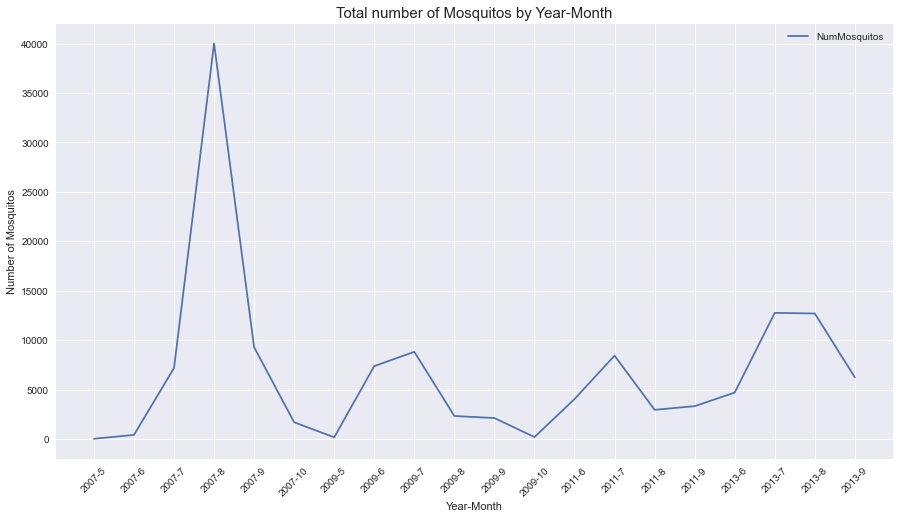

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
year_month = combined_df[["Year", "NumMosquitos", "Month"]].groupby(["Year", "Month"]).sum()
year_month.plot(ax=ax)
year_month_labels = [(f"{item[0]}-{item[1]}") for item in year_month.index]
ax.set_xticks([i for i in range(len(year_month_labels))])
ax.set_xticklabels(year_month_labels, rotation=45)
ax.set_xlabel("Year-Month")
ax.set_ylabel("Number of Mosquitos")
ax.set_title("Total number of Mosquitos by Year-Month", fontsize=15);

In general, it seems that there is trend that towards July and August, there is a peak. Furthermore, there seems to be an outbreak during 2007 with more regular sampling and collection of the traps. 

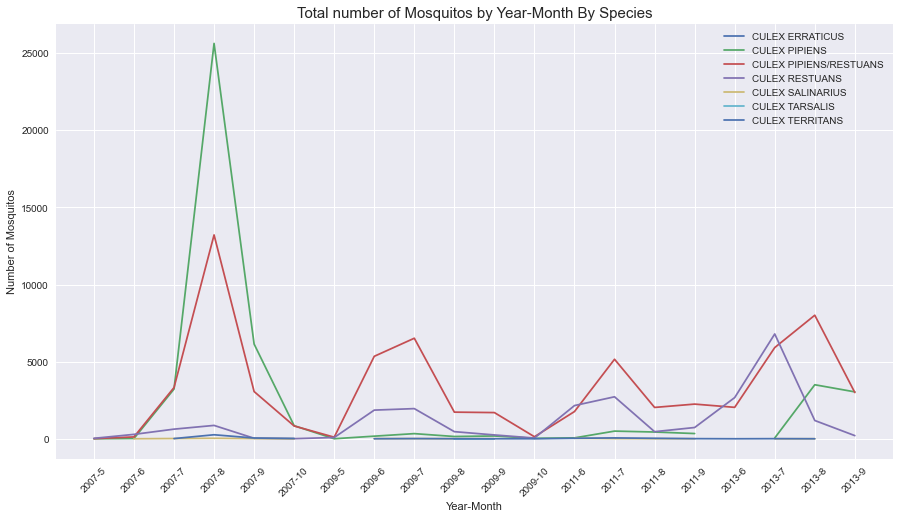

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
year_month_species = combined_df[["Year", "NumMosquitos", "Month", "Species"]].groupby(["Year", "Month", "Species"]).sum()
year_month_species.unstack(level=2).plot(ax=ax)
ax.set_xticks([i for i in range(len(year_month_labels))])
ax.set_xticklabels(year_month_labels, rotation=45)
ax.set_xlabel("Year-Month")
ax.set_ylabel("Number of Mosquitos")
ax.set_title("Total number of Mosquitos by Year-Month By Species", fontsize=15)
species_label = [item[1] for item in year_month_species.unstack(level=2).columns]
ax.legend(labels=species_label)


For individual species, they seem to follow the general mosquito population trend as well. This shows that they grow at similar rate.

Text(0.5, 0, 'Number of Mosquitos')

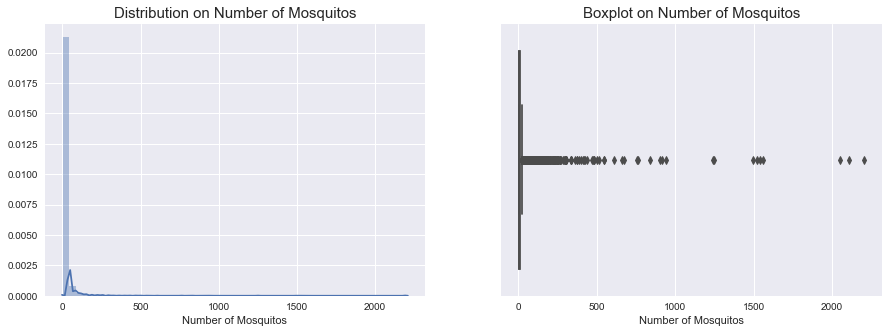

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.distplot(combined_df["NumMosquitos"], ax=ax1)
ax1.set_title("Distribution on Number of Mosquitos", fontsize=15)
ax1.set_xlabel("Number of Mosquitos")

sns.boxplot(combined_df["NumMosquitos"])
ax2.set_title("Boxplot on Number of Mosquitos", fontsize=15)
ax2.set_xlabel("Number of Mosquitos")

As explored earlier, the distribution is heavily skewed. This may affect the modelling but they also contain important information on the probabilities of the mosquitos having the WNV.

**Distribution of Traps Collected Each Week, By Year**

<ipython-input-14-02921b563df4>:9: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.0)


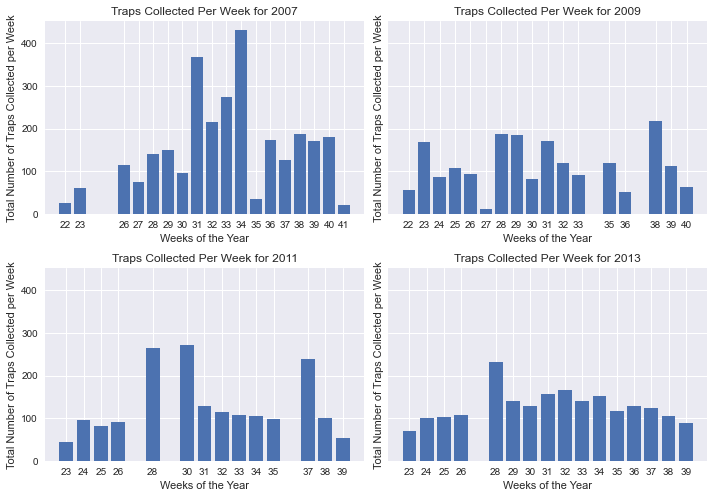

In [14]:
fig, ax = plt.subplots(2,2, figsize = (10,7), sharey='all')
ax = ax.ravel()
for n, year in enumerate(combined_df['Year'].unique()):
    ax[n].set_title(f"Traps Collected Per Week for {year}", size= 12)
    ax[n].bar(combined_df[combined_df['Year'] == year]['Week'].value_counts().index, combined_df[combined_df['Year'] == year]['Week'].value_counts().values)
    ax[n].set_xticks(combined_df[combined_df['Year'] == year]['Week'].value_counts().index)
    ax[n].set_xlabel('Weeks of the Year')
    ax[n].set_ylabel('Total Number of Traps Collected per Week')
plt.tight_layout(1.0)

The traps are collected on a regular basis, and the number of traps per week do not differ much. There are some gaps between weeks. This could be due to collection error. In 2007, more traps were set up and collected as there were larger outbreaks.

**Temperature Distribution Comparing Datapoints Each Year**

<ipython-input-15-bbc45ec309ed>:7: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.0)


Text(49.875, 0.5, 'Monthly Average Temperature')

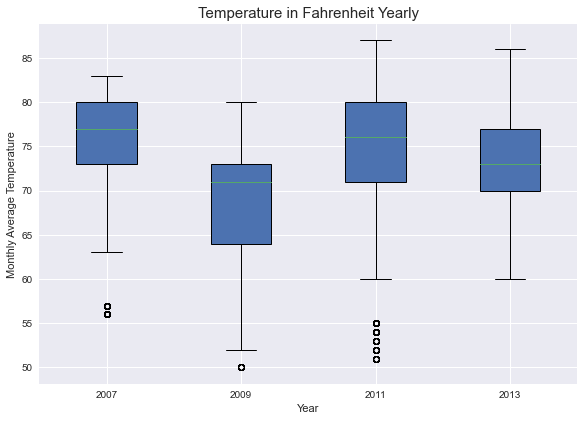

In [15]:
plt.figure()
data = []
for n, year in enumerate(combined_df['Year'].unique()):
    data.append(combined_df[combined_df['Year'] == year]['Tavg'])
    
plt.boxplot(data,labels = combined_df['Year'].unique(), patch_artist=True)
plt.tight_layout(1.0)

plt.title(f"Temperature in Fahrenheit Yearly", size= 15)
plt.xlabel('Year')
plt.ylabel('Monthly Average Temperature')

There are a few outliers where the weather turned much colder than expected. In general, the temperature hovers around 65 degrees to 80 degrees Fahrenheit.

This shows the average temperature of the time that the dataset was collected and not the average temperature of the year.

**Percentage of Species Collected in Total**

This gives us a rough sense of the general composition of each species.

Text(0.5, 1.0, 'Percentage of Species Collected')

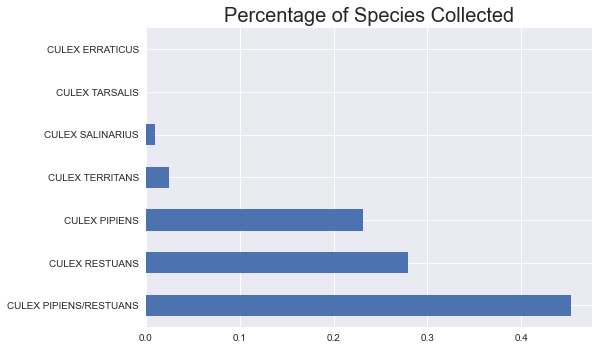

In [16]:
combined_df["Species"].value_counts(normalize=True).plot(kind='barh')
plt.title("Percentage of Species Collected", fontsize=20)

**Examine the Balance of our Class**

We would like to examine our sample to see how many percent are positive and negative. This will give us an idea of whether we have a balanced or imbalanced class.

In [17]:
combined_df["WnvPresent"].value_counts(normalize=True)

0    0.946922
1    0.053078
Name: WnvPresent, dtype: float64

Text(0.5, 1.0, '% of MNV positive in mosquitos')

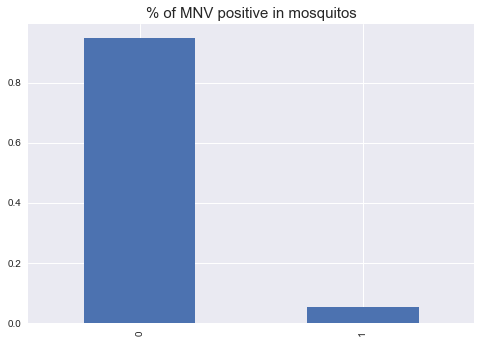

In [18]:
combined_df["WnvPresent"].value_counts(normalize=True).plot(kind="bar")
plt.title("% of MNV positive in mosquitos", fontsize=15)

94.6% of the sample collected is negative on MNV. Only 5.3% positive. We will have to adjust during the preprocessing stage to ensure a fairer and more accurate model.
This can also mean that there is a general probability of 0.05% that a mosquito will carry the west nile virus

Text(0.5, 1.0, 'WNV present by Mosquitos Species')

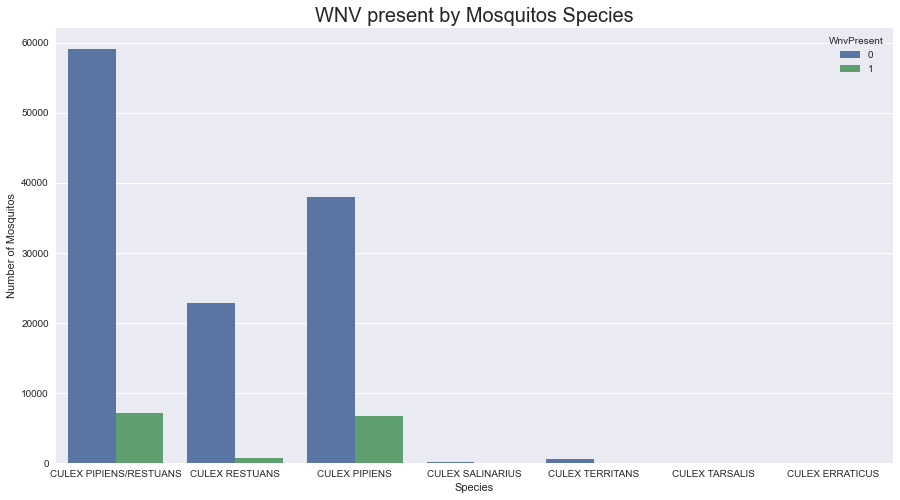

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="Species", y="NumMosquitos", hue="WnvPresent", data=combined_df, ci=None, estimator=sum)
ax.set_ylabel("Number of Mosquitos")
ax.set_xlabel("Species")
ax.set_title("WNV present by Mosquitos Species", fontsize=20)

Among all the mosquitos species, culex pipiens/restuans has the higest % of being positive for WNV. Culex Erraticus, Culex Tarsalis, Culex Salinarius and Culex Territans are the minority here. We can also assume that the probability of them getting the virus is also low.

**Probability of WNV present in each Species**

We would like to examine whether certain species are more likely to carry the virus.

In [20]:
combined_df[["Species", "NumMosquitos", "WnvPresent"]].groupby("Species").sum()

,NumMosquitos,WnvPresent
Species,,
CULEX ERRATICUS,7,0
CULEX PIPIENS,44671,184
CULEX PIPIENS/RESTUANS,66268,225
CULEX RESTUANS,23431,48
CULEX SALINARIUS,145,0
CULEX TARSALIS,7,0
CULEX TERRITANS,510,0


For at least 4 species (CULEX ERRATICUS, CULEX, TERRITANS, CULEX SALINARIUS and CULEX TARSALIS), they do not carry the virus at all.

In [21]:
proba_wnv_species = combined_df.groupby('Species').mean()['WnvPresent'].sort_values(ascending=True)
proba_wnv_species

Species
CULEX ERRATICUS           0.000000
CULEX SALINARIUS          0.000000
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.000000
CULEX RESTUANS            0.019925
CULEX PIPIENS/RESTUANS    0.057707
CULEX PIPIENS             0.092184
Name: WnvPresent, dtype: float64

Text(0, 0.5, 'Species Type')

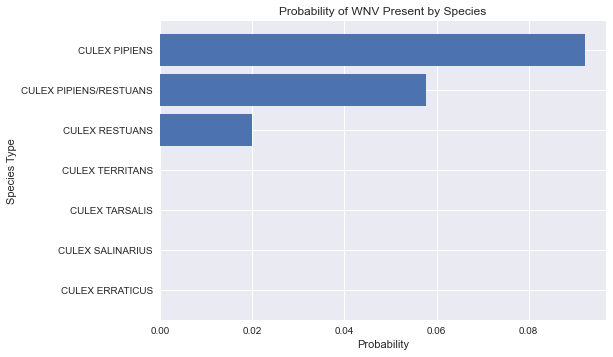

In [22]:
plt.barh(proba_wnv_species.index, proba_wnv_species)
plt.title("Probability of WNV Present by Species")
plt.xlabel("Probability")
plt.ylabel("Species Type")

CULEX PIPIENS have the highest probability of carrying the West Nile Virus while CULEX ERRATICUS, CULEX, TERRITANS, CULEX SALINARIUS and CULEX TARSALIS have almost zero chances of carrying the virus.

## Plot Geo map

In [23]:
#reading the shp file
city_map = gpd.read_file("../datasets/chicago_geodata/geo_export_55fcb48c-7621-4c8a-999c-9fb3c86e8950.shp")

In [24]:
# init Coordinate Reference Systems
crs = {'init': 'epsg:4326'}

# Converting Latitude and Longitude to geo points for combined data
combined_geo = [Point(xy) for xy in zip(combined_df.Longitude, combined_df.Latitude)]

# Creating a GeoDataFrame for combined data
combined_geo_df = gpd.GeoDataFrame(combined_df, crs=crs, geometry=combined_geo)

c:\python38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [25]:
#Converting Latitude and Longitude to geo points for spray data
spray_geo = [Point(xy) for xy in zip(spray_df.Longitude, spray_df.Latitude)]

# Creating a GeoDataFrame for combined data
spray_geo_df = gpd.GeoDataFrame(spray_df, crs=crs, geometry=spray_geo)

In [26]:
#Converting Latitude and Longitude to geo points for Stations location
station_geo = {"station": ["station_1", "station_2"], "geometry": [Point(-87.933, 41.995), Point(-87.752, 41.786)]}

# Creating a GeoDataFrame for combined data
station_geo_df = gpd.GeoDataFrame(station_geo, crs=crs)

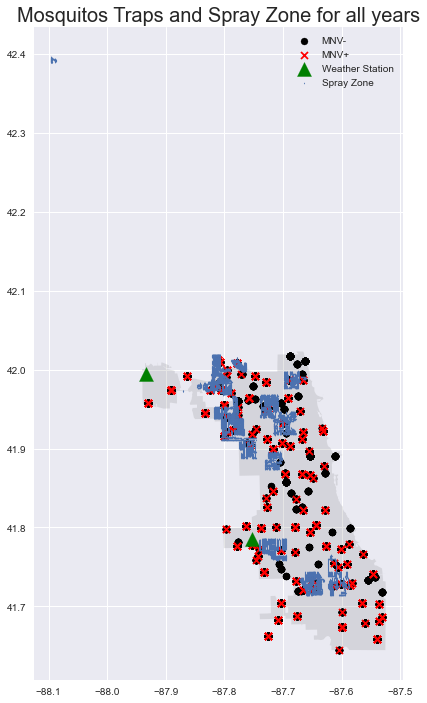

In [27]:
fig, ax = plt.subplots(figsize=(12,12))
city_map.plot(ax=ax, alpha=0.2, color='grey')
combined_geo_df[combined_geo_df["WnvPresent"] == 0].plot(ax=ax, color='black', marker='o', label="MNV-")
combined_geo_df[combined_geo_df["WnvPresent"] == 1].plot(ax=ax, color='red', marker='x', label="MNV+")
station_geo_df.plot(ax=ax, color="green", markersize=200, marker='^', label="Weather Station")
spray_geo_df.plot(ax=ax, marker='d', markersize=1, label='Spray Zone')
ax.set_title("Mosquitos Traps and Spray Zone for all years", fontsize=20)
plt.legend()

There are a few datapoints which seems too far off Chicago. Seems like human error.

In [28]:
#finding the outlier
spray_df[spray_df["Latitude"] > 42.3]

,Unnamed: 0,Date,Time,Latitude,Longitude,Day,Month,Year,geometry
0,0,2011-08-29,6:56:58 PM,42.391623,-88.089163,29,8,2011,POINT (-88.08916 42.39162)
1,1,2011-08-29,6:57:08 PM,42.391348,-88.089163,29,8,2011,POINT (-88.08916 42.39135)
2,2,2011-08-29,6:57:18 PM,42.391022,-88.089157,29,8,2011,POINT (-88.08916 42.39102)
3,3,2011-08-29,6:57:28 PM,42.390637,-88.089158,29,8,2011,POINT (-88.08916 42.39064)
4,4,2011-08-29,6:57:38 PM,42.390410,-88.088858,29,8,2011,POINT (-88.08886 42.39041)
...,...,...,...,...,...,...,...,...,...
90,90,2011-08-29,7:14:38 PM,42.392902,-88.093853,29,8,2011,POINT (-88.09385 42.39290)
91,91,2011-08-29,7:14:48 PM,42.392587,-88.093867,29,8,2011,POINT (-88.09387 42.39259)
92,92,2011-08-29,7:14:58 PM,42.392308,-88.093873,29,8,2011,POINT (-88.09387 42.39231)
93,93,2011-08-29,7:15:18 PM,42.392183,-88.093767,29,8,2011,POINT (-88.09377 42.39218)


found that the spray were all on 2011-08-29. Suspect it might be human error, key in the wrong date. The following will be plotted without the outliers

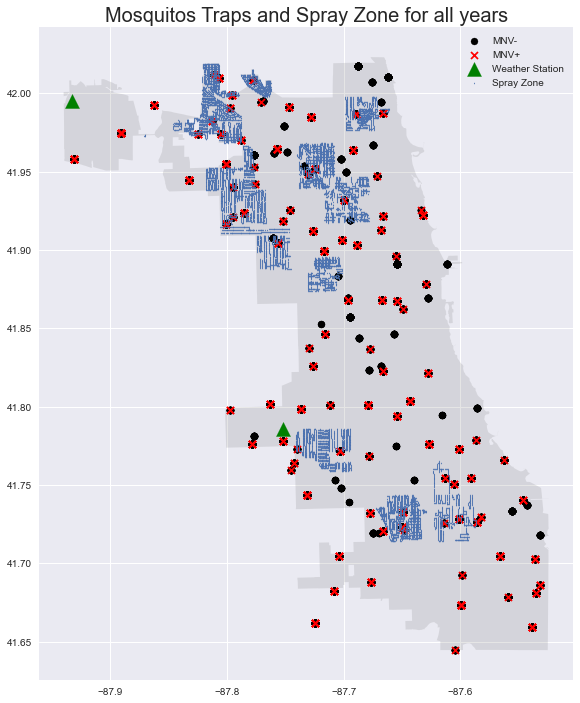

In [29]:
#plot without outlier
fig, ax = plt.subplots(figsize=(12,12))
city_map.plot(ax=ax, alpha=0.2, color='grey')
combined_geo_df[combined_geo_df["WnvPresent"] == 0].plot(ax=ax, color='black', marker='o', label="MNV-")
combined_geo_df[combined_geo_df["WnvPresent"] == 1].plot(ax=ax, color='red', marker='x', label="MNV+")
station_geo_df.plot(ax=ax, color="green", markersize=200, marker='^', label="Weather Station")
spray_geo_df[spray_geo_df["Date"] != "2011-08-29"].plot(ax=ax, marker='d', markersize=1, label='Spray Zone')
ax.set_title("Mosquitos Traps and Spray Zone for all years", fontsize=20)
plt.legend()

### Plot traps and spray for each years

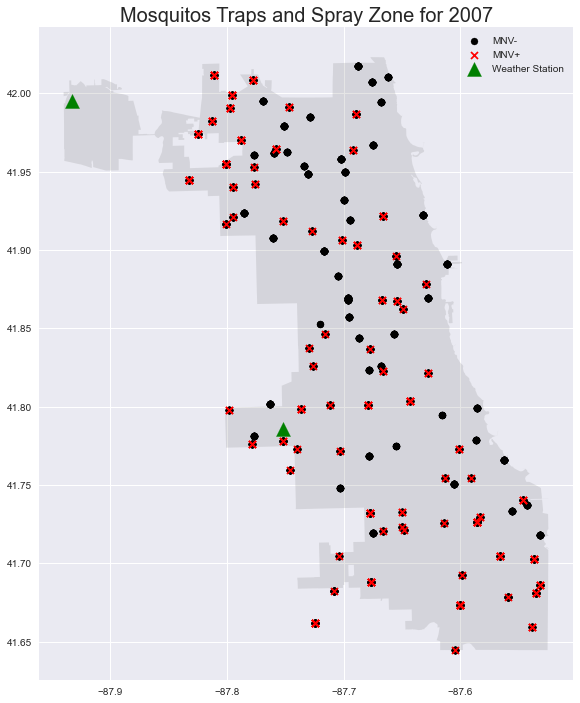

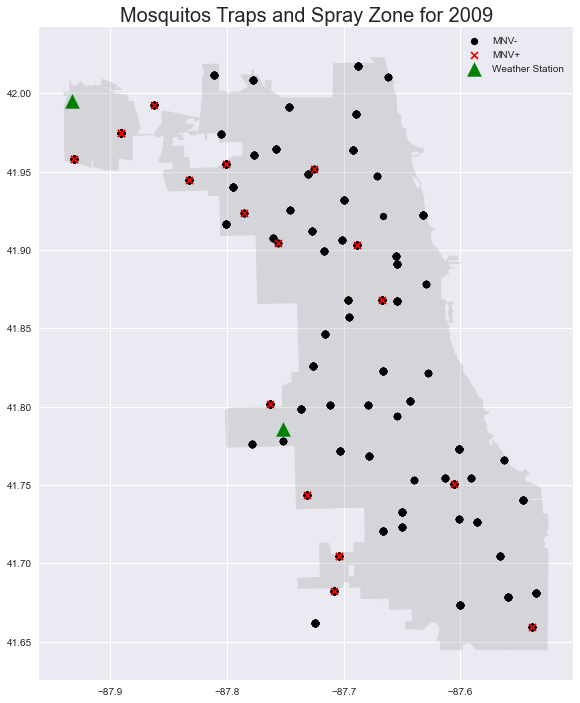

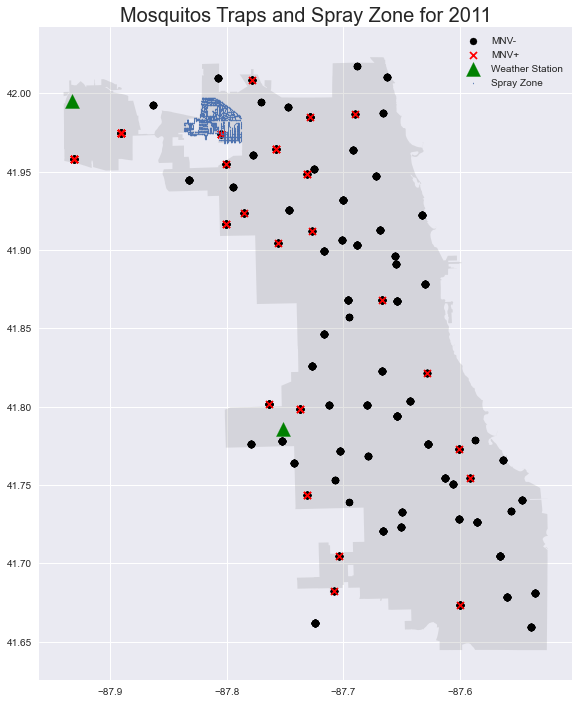

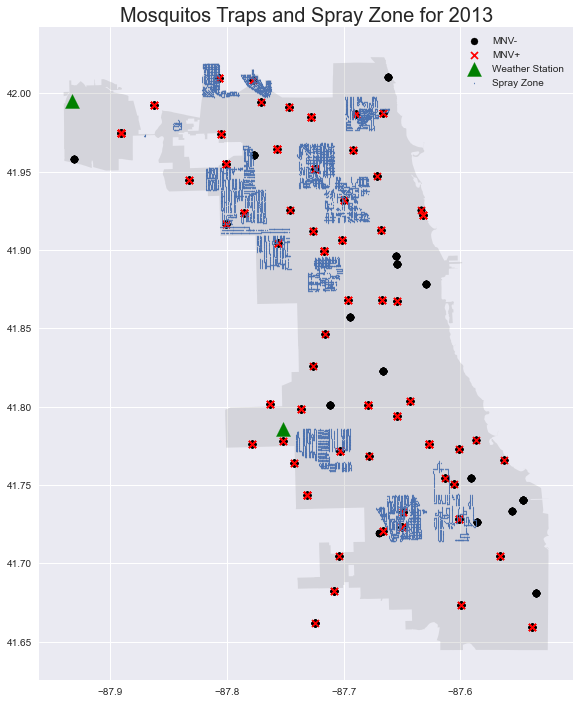

In [30]:
for year in combined_df["Year"].unique():
    
    fig, ax = plt.subplots(figsize=(12,12))
    city_map.plot(ax=ax, alpha=0.2, color='grey')
    
    wnv_neg = (combined_geo_df["WnvPresent"] == 0) & (combined_geo_df["Year"] == year)
    wnv_pos = (combined_geo_df["WnvPresent"] == 1) & (combined_geo_df["Year"] == year)
    
    combined_geo_df[wnv_neg].plot(ax=ax, color='black', marker='o', label="MNV-")
    combined_geo_df[wnv_pos].plot(ax=ax, color='red', marker='x', label="MNV+")
    station_geo_df.plot(ax=ax, color="green", markersize=200, marker='^', label="Weather Station")
    
    if year == 2007 or year == 2009:
        ax.set_title(f"Mosquitos Traps and Spray Zone for {year}", fontsize=20)
        plt.legend()
    else:
        spray_geo_df[(spray_geo_df["Date"] != "2011-08-29") & (spray_geo_df["Year"] == year)].plot(ax=ax, marker='d', markersize=1, label='Spray Zone')
        ax.set_title(f"Mosquitos Traps and Spray Zone for {year}", fontsize=20)
        plt.legend()

    

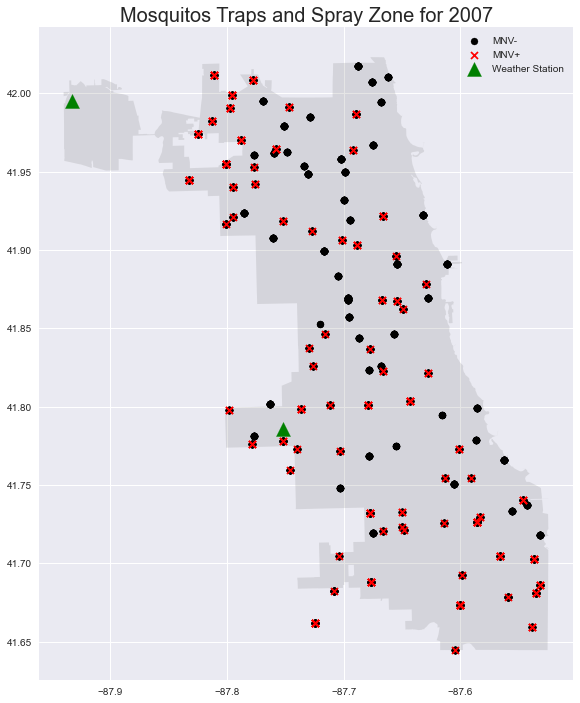

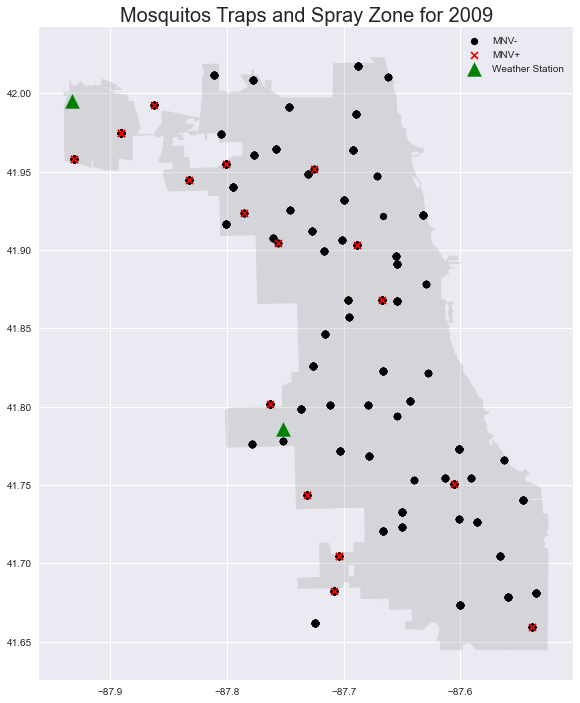

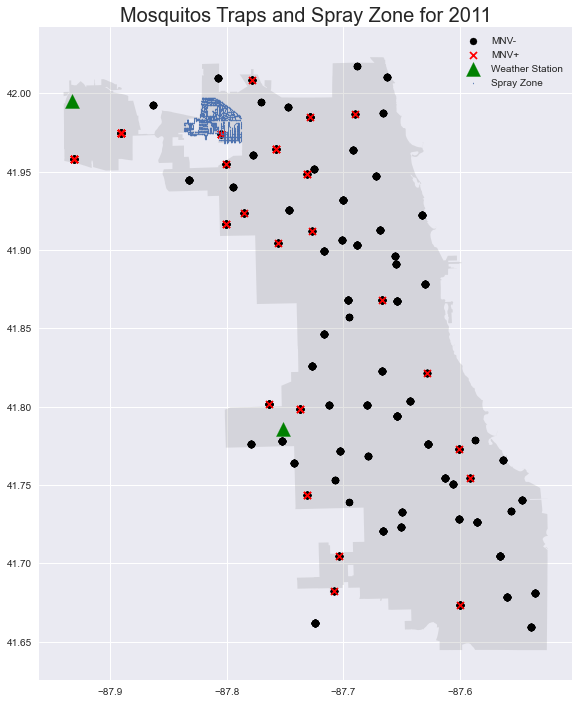

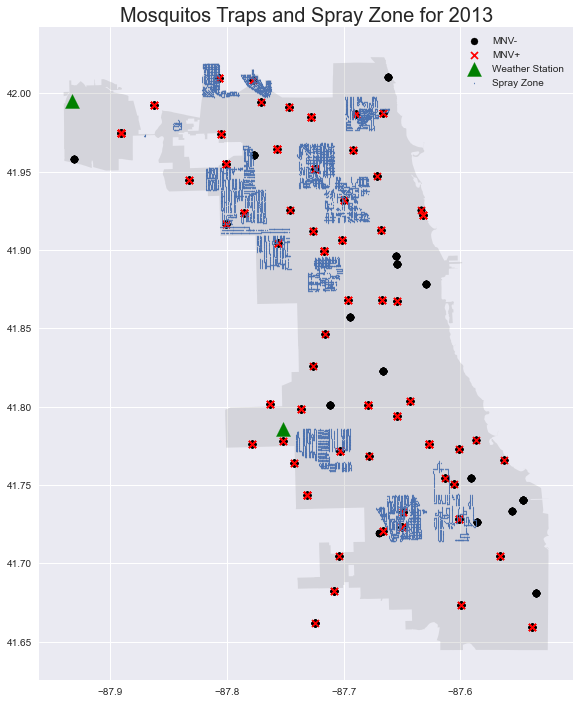

In [31]:
for year in combined_df["Year"].unique():
    
    fig, ax = plt.subplots(figsize=(12,12))
    city_map.plot(ax=ax, alpha=0.2, color='grey')
    
    wnv_neg = (combined_geo_df["WnvPresent"] == 0) & (combined_geo_df["Year"] == year)
    wnv_pos = (combined_geo_df["WnvPresent"] == 1) & (combined_geo_df["Year"] == year)
    
    combined_geo_df[wnv_neg].plot(ax=ax, color='black', marker='o', label="MNV-")
    combined_geo_df[wnv_pos].plot(ax=ax, color='red', marker='x', label="MNV+")
    station_geo_df.plot(ax=ax, color="green", markersize=200, marker='^', label="Weather Station")
    
    if year == 2007 or year == 2009:
        ax.set_title(f"Mosquitos Traps and Spray Zone for {year}", fontsize=20)
        plt.legend()
    else:
        spray_geo_df[(spray_geo_df["Date"] != "2011-08-29") & (spray_geo_df["Year"] == year)].plot(ax=ax, marker='d', markersize=1, label='Spray Zone')
        ax.set_title(f"Mosquitos Traps and Spray Zone for {year}", fontsize=20)
        plt.legend()


## Examining the Effectiveness of Spraying Pesticides on Number of Mosquitoes

It is vital to see how effective the pesticides are generally. To determine so, we will plot the number of mosquitos on bar graph to show the before and after of spraying pesticides.

**Spraying in 2011**

For the year of 2011, only the region around T009 was sprayed. Therefore, we can start looking from there.

In [32]:
# add a new column 'Week' for date of the week
spray_df['Week'] = spray_df['Date'].map(date_to_week)

# find out which weaks did they spray
spray_weeks = spray_df.groupby('Year')['Week'].unique()

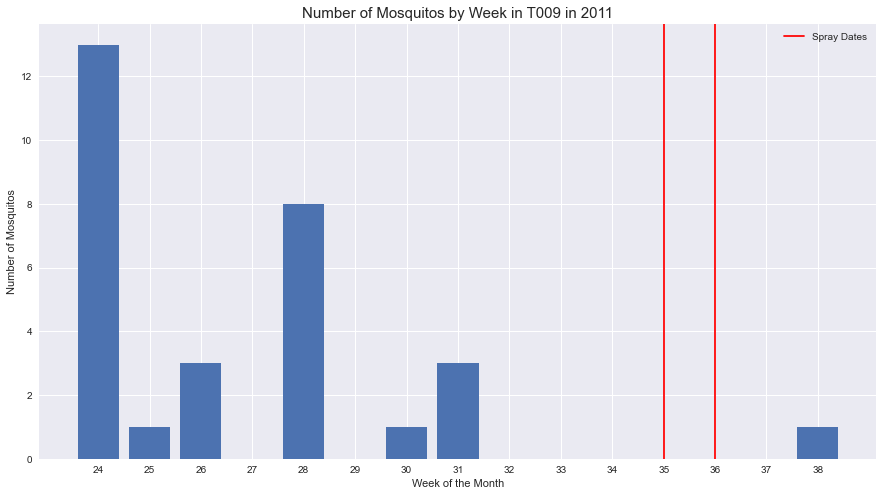

In [33]:
t009_2013 = combined_df[(combined_df['Trap'] == 'T009') & (combined_df['Year']==2011)]

plt.figure(figsize=(15, 8))
plt.bar(t009_2013.groupby(['Year','Week']).sum()['NumMosquitos'][2011].index, t009_2013.groupby(['Year','Week']).sum()['NumMosquitos'][2011].values)
plt.xticks(range(24,39,1))
plt.xlabel('Week of the Month')
plt.ylabel('Number of Mosquitos')
plt.title('Number of Mosquitos by Week in T009 in 2011', size = 15)
for d in spray_weeks[2011]:
    plt.axvline(d, 0, 1,c='r')
plt.legend(['Spray Dates'])

It seems that the spraying did work because the number of mosquitos declined the very next time the trap was collected on week 38. However, it is truly difficult to know for sure if the trap worked beyond week 38. Next, we will examine the year 2013 where more locations were sprayed. 

**Spraying in 2013**

In [34]:
# 2013 number of mosquitos per week in 2013
traps_2013 = combined_df.groupby(['Year','Week']).sum()['NumMosquitos'][2013]

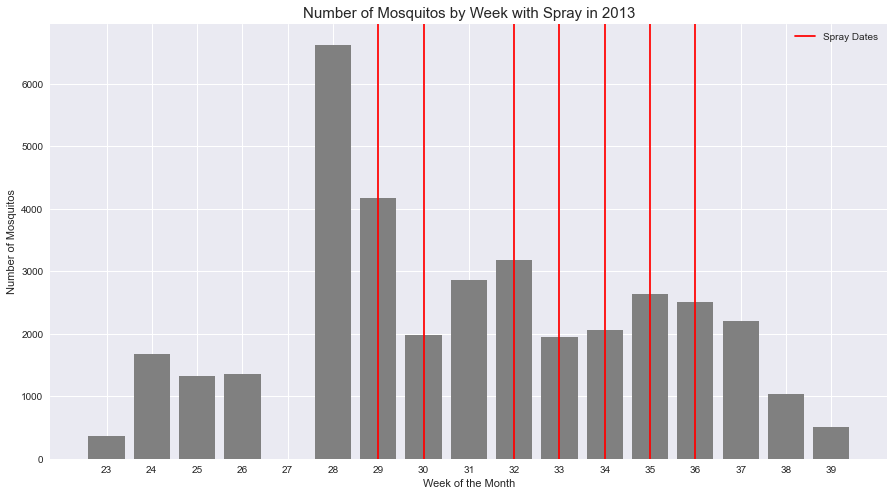

In [35]:
# plot number of mosquitos and the dates which they sprayed

plt.figure(figsize=(15, 8))
plt.bar(traps_2013.index, traps_2013.values, color = 'grey')
plt.xticks(range(23,40))
plt.xlabel('Week of the Month')
plt.ylabel('Number of Mosquitos')
plt.title('Number of Mosquitos by Week with Spray in 2013', size = 15)
for d in spray_weeks[2013]:
    plt.axvline(d, 0, 1,c='r')
plt.legend(['Spray Dates'])

In general, there seems to be a declining trend during and after the weeks of spraying the pesticide. At the very least, it did not increase drastically, showing that the population was controlled. This is in spite of the week 30 to 40 being the most optimal breeding climate for the mosquitos. Although not all locations were sprayed, most were sprayed. Hence, it is reasonable to conclude that the spraying has worked to a large extent.

**T013 and T151 in 2013**

These two traps were picked to be examined because the traps' vacinity had been thoroughly sprayed.

<ipython-input-36-dc03fe18ea21>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cell = combined_df[(combined_df['Latitude'] > 41.90) & (combined_df['Latitude'] < 41.95)][(combined_df['Longitude'] <-87.77) & (combined_df['Longitude'] > -87.83)]
<ipython-input-36-dc03fe18ea21>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spray_days = spray_df[(spray_df['Latitude'] > 41.90) & (spray_df['Latitude'] < 41.95)][(spray_df['Longitude'] <-87.77) & (spray_df['Longitude'] > -87.83)][spray_df['Year']==2013]['Date']
<ipython-input-36-dc03fe18ea21>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spray_days = spray_df[(spray_df['Latitude'] > 41.90) & (spray_df['Latitude'] < 41.95)][(spray_df['Longitude'] <-87.77) & (spray_df['Longitude'] > -87.83)][spray_df['Year']==2013]['Date']


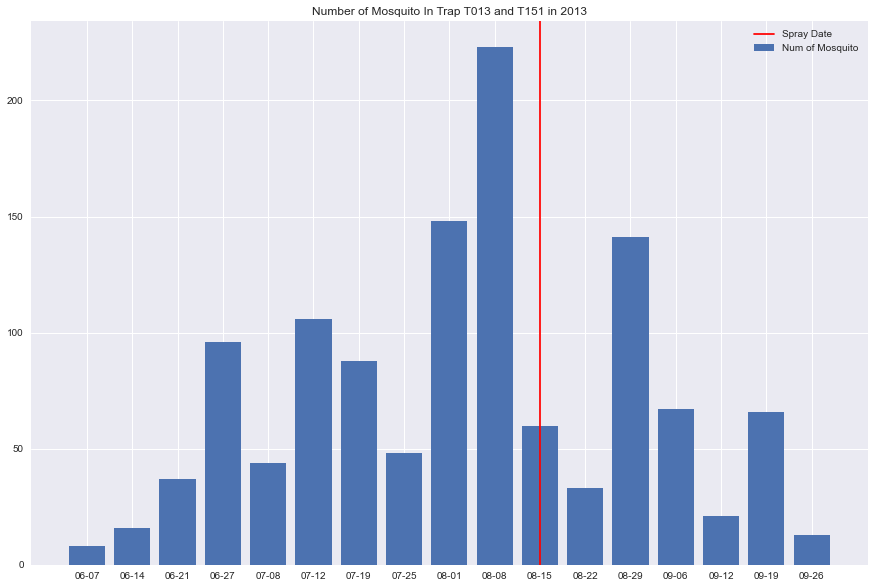

In [36]:
# Find the grid of interest, lat = >41.90, <41.95 and Long = <-87.77, -87.83

cell = combined_df[(combined_df['Latitude'] > 41.90) & (combined_df['Latitude'] < 41.95)][(combined_df['Longitude'] <-87.77) & (combined_df['Longitude'] > -87.83)]
cell = cell[cell['Year']==2013]

# turns out that it is Trap T013 and T151

# find the days which the spray was used, based on latitude and longitude in that same area
spray_days = spray_df[(spray_df['Latitude'] > 41.90) & (spray_df['Latitude'] < 41.95)][(spray_df['Longitude'] <-87.77) & (spray_df['Longitude'] > -87.83)][spray_df['Year']==2013]['Date']
spray_days.unique()

# save into a list
spray_dates = [date[-5:] for date in list(spray_days.unique())]

# plot them on a graph
plt.figure(figsize=(15,10))
plt.bar([date[-5:] for date in list(cell.groupby('Date').sum()['NumMosquitos'].index)], cell.groupby('Date').sum()['NumMosquitos'].values)
plt.xticks([date[-5:] for date in list(cell.groupby('Date').sum()['NumMosquitos'].index)])
# one spray dates were removed because there 
for d in spray_dates[:3]:
    plt.axvline(d, 0, 1,c='r')
plt.title('Number of Mosquito In Trap T013 and T151 in 2013')
plt.legend(['Spray Date', 'Num of Mosquito'])

Spraying has moderate effectiveness as the number of mosquitoes seems to have fallen a little bit after the spray for these two trap places. However, a spike in certain weeks could mean that there were some hard-to-reach area where the mosquito was able to breed safely.

**Investigate the 3 Highest WNV+ Traps for Each Year**

<ipython-input-37-7189ce541547>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trap_df = trap_year[(combined_df["Trap"] == trap)]
<ipython-input-37-7189ce541547>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trap_df = trap_year[(combined_df["Trap"] == trap)]
<ipython-input-37-7189ce541547>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trap_df = trap_year[(combined_df["Trap"] == trap)]
<ipython-input-37-7189ce541547>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trap_df = trap_year[(combined_df["Trap"] == trap)]


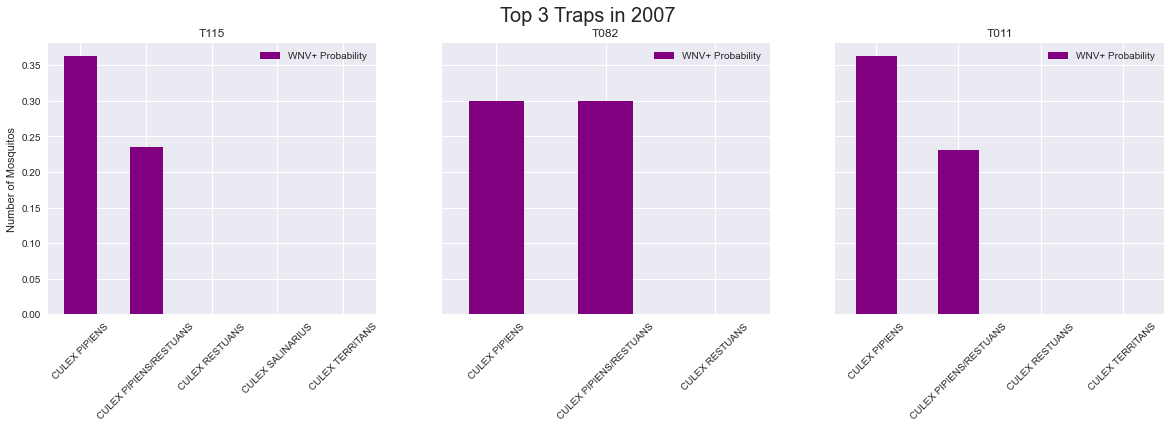

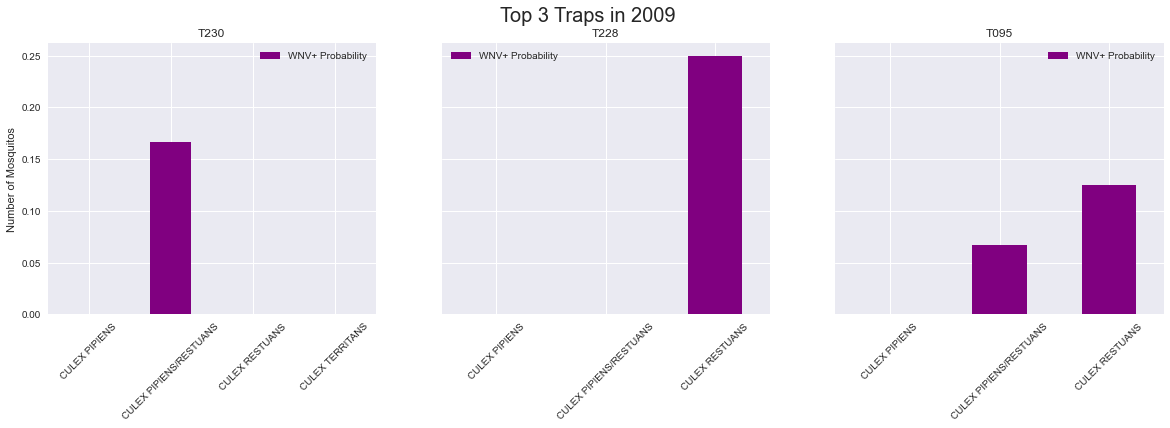

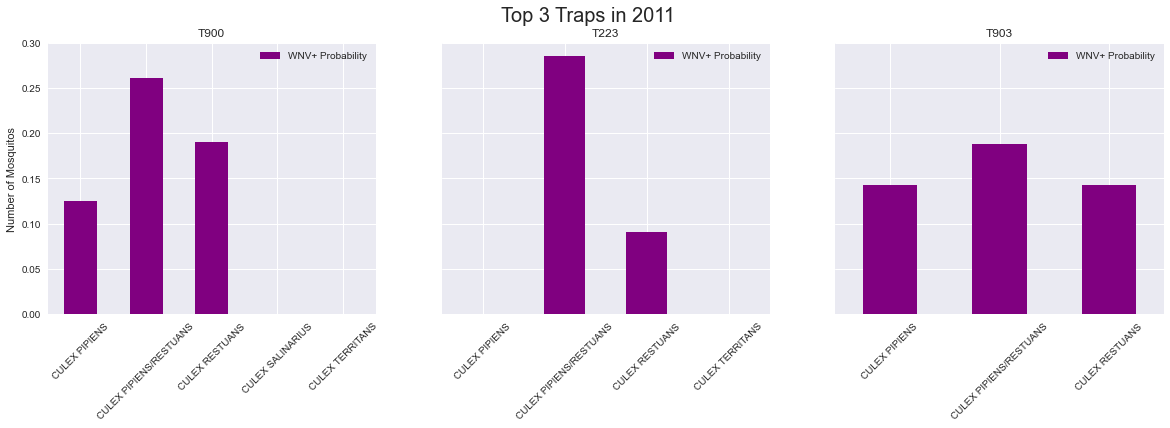

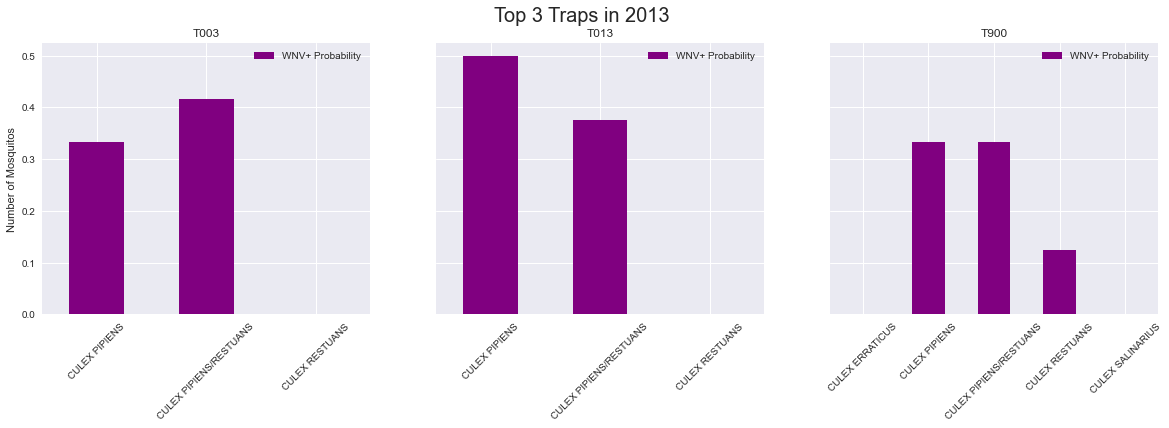

In [37]:
# for each year, plot a subplot
for _, year in enumerate(combined_df["Year"].unique()):
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5), sharey="all")
    ax = ax.ravel()
    
    #filter dataframe by year
    trap_year = combined_df[combined_df["Year"] == year]
    
    #filter the top 3 traps by highest probability of WNV present
    top_traps = trap_year[["Trap", "WnvPresent"]].groupby(["Trap"]).mean().sort_values(by="WnvPresent", ascending=False).head(3)
    
    # for each trap, plot on one axis of subplot
    for i, trap in enumerate(top_traps.index):
        trap_df = trap_year[(combined_df["Trap"] == trap)]
        trap_df = trap_df.groupby(['Trap', 'Species'])['WnvPresent'].mean()
        trap_df.plot(kind="bar", ax=ax[i], color='purple')
        fig.suptitle(f"Top 3 Traps in {year}", fontsize=20)
        ax[i].set_title(trap)
        ax[i].set_ylabel("Number of Mosquitos")
        ax[i].set_xlabel("")
        ax[i].set_xticklabels(trap_df.unstack().transpose().index, rotation=45)
        ax[i].legend(["WNV+ Probability"])

These are the clusters that should be on the watch list as they have a population of mosquitos with the highest probability of getting infected. Especially T900, it has been on the top 3 for 2011 and 2013. It should also be in the list of 2012. They have a probability of about 60%, which can pass the virus to other mosquitos and human as well.

However, looking at probability alone does not paint the complete picture. Next, we will investigate the traps with the most number of mosquitos.

**Investigate Top 3 Traps with Most Number of Mosquitos for Each Year**

<ipython-input-38-196553726707>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trap_df = trap_year[(combined_df["Trap"] == trap)]
<ipython-input-38-196553726707>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trap_df = trap_year[(combined_df["Trap"] == trap)]
<ipython-input-38-196553726707>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trap_df = trap_year[(combined_df["Trap"] == trap)]
<ipython-input-38-196553726707>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trap_df = trap_year[(combined_df["Trap"] == trap)]


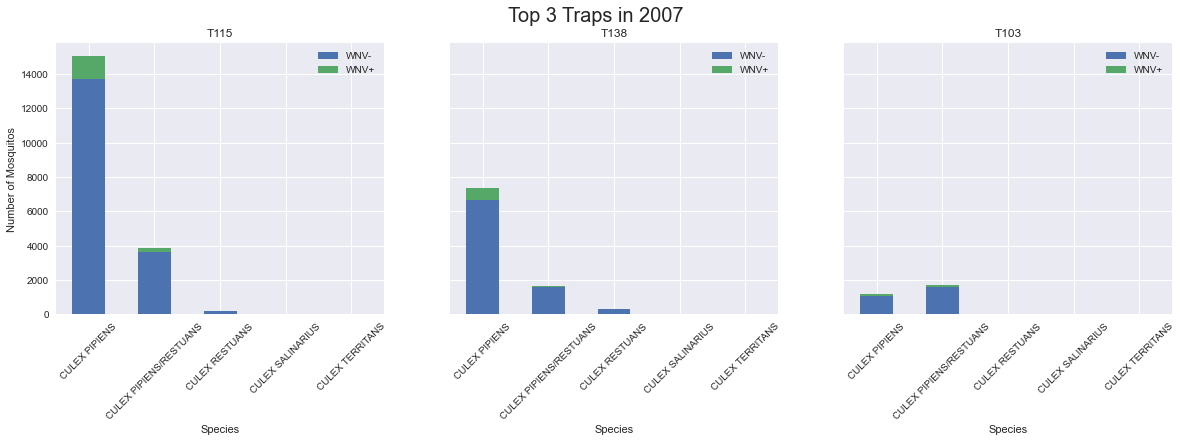

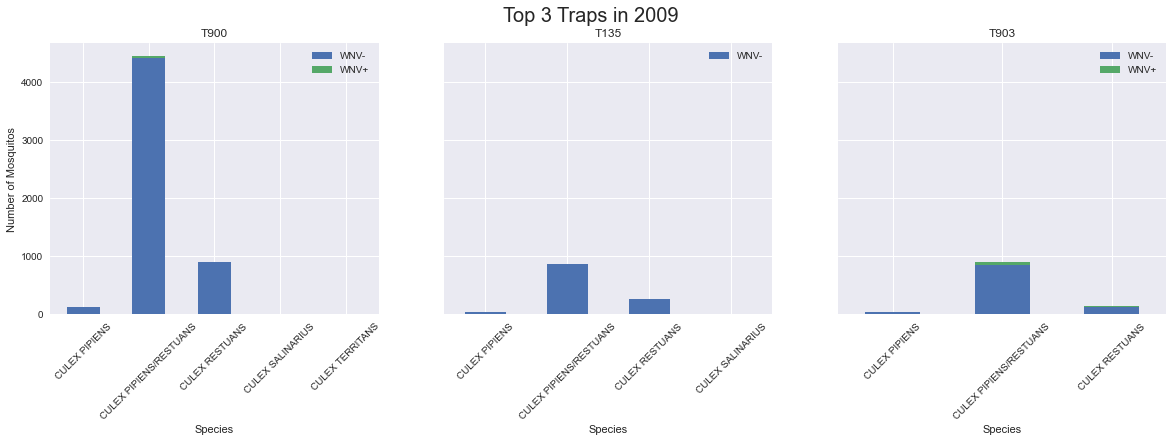

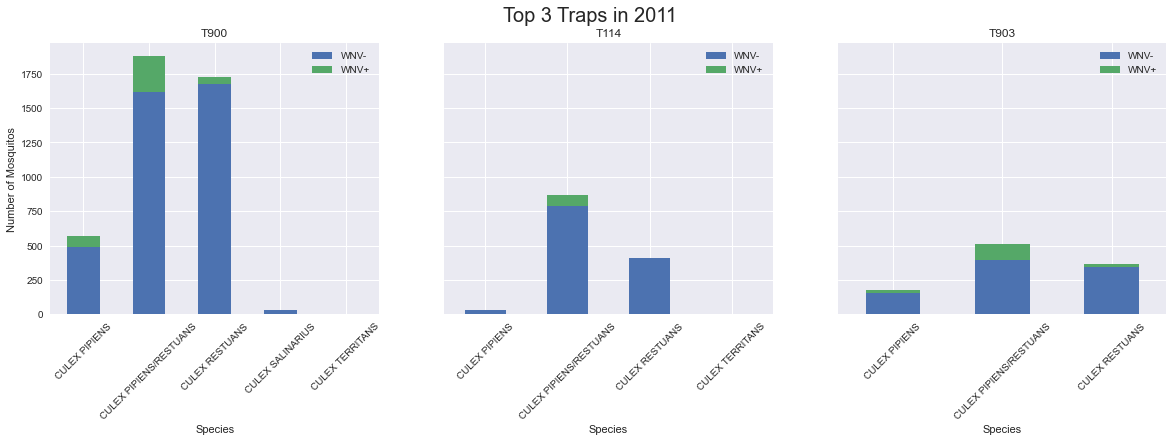

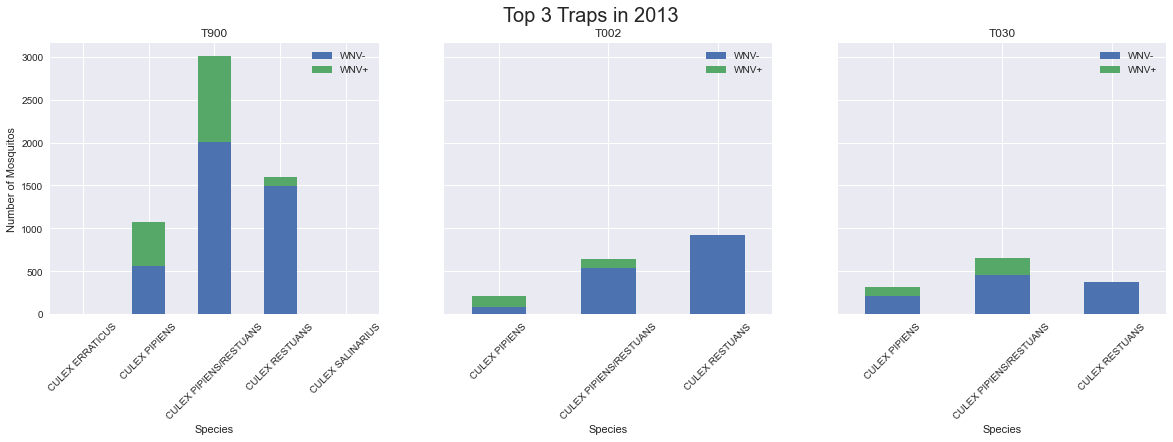

In [38]:
# for each year, plot a subplot
for _, year in enumerate(combined_df["Year"].unique()):
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5), sharey="all")
    ax = ax.ravel()
    
    #filter dataframe by year
    trap_year = combined_df[combined_df["Year"] == year]
    
    #identify top 3 highest number of mosquitos, plot on axis
    top_traps = trap_year[["Trap", "NumMosquitos"]].groupby(["Trap"]).sum().sort_values(by="NumMosquitos", ascending=False).head(3)
    for i, trap in enumerate(top_traps.index):
        trap_df = trap_year[(combined_df["Trap"] == trap)]
        trap_df = trap_df[["Trap", "Species", "NumMosquitos", "WnvPresent"]].groupby(["Trap", "WnvPresent", "Species"]).sum().unstack(level=1)
        trap_df.plot(kind="bar", ax=ax[i], stacked=True)
        fig.suptitle(f"Top 3 Traps in {year}", fontsize=20)
        ax[i].set_title(trap)
        ax[i].set_ylabel("Number of Mosquitos")
        ax[i].set_xlabel("Species")
        x_label = [row[1] for row in trap_df.index]
        ax[i].set_xticklabels(x_label, rotation=45)
        ax[i].legend(["WNV-", "WNV+"])

Again T900 appeared for 2009, 2011 and 2013, demonstrating that it has the largest mosquito breeding population. However, this could also be because of more traps being set up in more location. 

The graphs also meant that T002 and T030 are burgeoning clusters and should be watched closely as well.

**Idenfitying the most Urgent Clusters**

In order to identify the most areas where response is necessary, we will look at both of the above indicators. They should be areas where the trap has the highest probability of WNV+ AND the highest number of mosquitos.

We will also only examine the data in 2013, to see which areas should be focussed on in 2014.

In [39]:
# Using 2013 Data,
trap_year = combined_df[combined_df["Year"] == 2013]

# Identify the top 20 traps with the highest probability of WNV+
proba_mosq = trap_year[["Trap", "WnvPresent"]].groupby(["Trap"]).mean().sort_values(by="WnvPresent", ascending=False).head(20).index
proba_mosq

Index(['T003', 'T013', 'T900', 'T225', 'T235', 'T030', 'T027', 'T028', 'T233',
       'T230', 'T147', 'T002', 'T223', 'T066', 'T228', 'T061', 'T231', 'T054',
       'T008', 'T226'],
      dtype='object', name='Trap')

In [40]:
# Identify the top 20 traps with the highest number of WNV+ mosquitoes

num_mosq = trap_year[["Trap", "NumMosquitos"]].groupby(["Trap"]).sum().sort_values(by="NumMosquitos", ascending=False).head(20).index
num_mosq

Index(['T900', 'T002', 'T030', 'T008', 'T158', 'T115', 'T009', 'T227', 'T221',
       'T225', 'T066', 'T233', 'T159', 'T013', 'T048', 'T012', 'T090', 'T151',
       'T028', 'T228'],
      dtype='object', name='Trap')

In [41]:
# Identify the common traps in each category
# by checking if the trap in one list is in the other
# print in order of priority

for n, t in enumerate([t for t in num_mosq if t in proba_mosq]):
    print(f"The no.{n+1} urgent cluster to address in 2014 is Trap {t}.")


The no.1 urgent cluster to address in 2014 is Trap T900.
The no.2 urgent cluster to address in 2014 is Trap T002.
The no.3 urgent cluster to address in 2014 is Trap T030.
The no.4 urgent cluster to address in 2014 is Trap T008.
The no.5 urgent cluster to address in 2014 is Trap T225.
The no.6 urgent cluster to address in 2014 is Trap T066.
The no.7 urgent cluster to address in 2014 is Trap T233.
The no.8 urgent cluster to address in 2014 is Trap T013.
The no.9 urgent cluster to address in 2014 is Trap T028.
The no.10 urgent cluster to address in 2014 is Trap T228.


The above are the top 10 clusters to look out for. One way would be to cross refer to our model prediction to match this list. This will reinforce the need to respond immediately.

**Additional Info: Probability of Each Species with WNV Positive by Trap**

Below, we can look at how each trap is doing overall with the probabilities of each species being WNV+.

<ipython-input-42-2fda20d89fb2>:16: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.0)


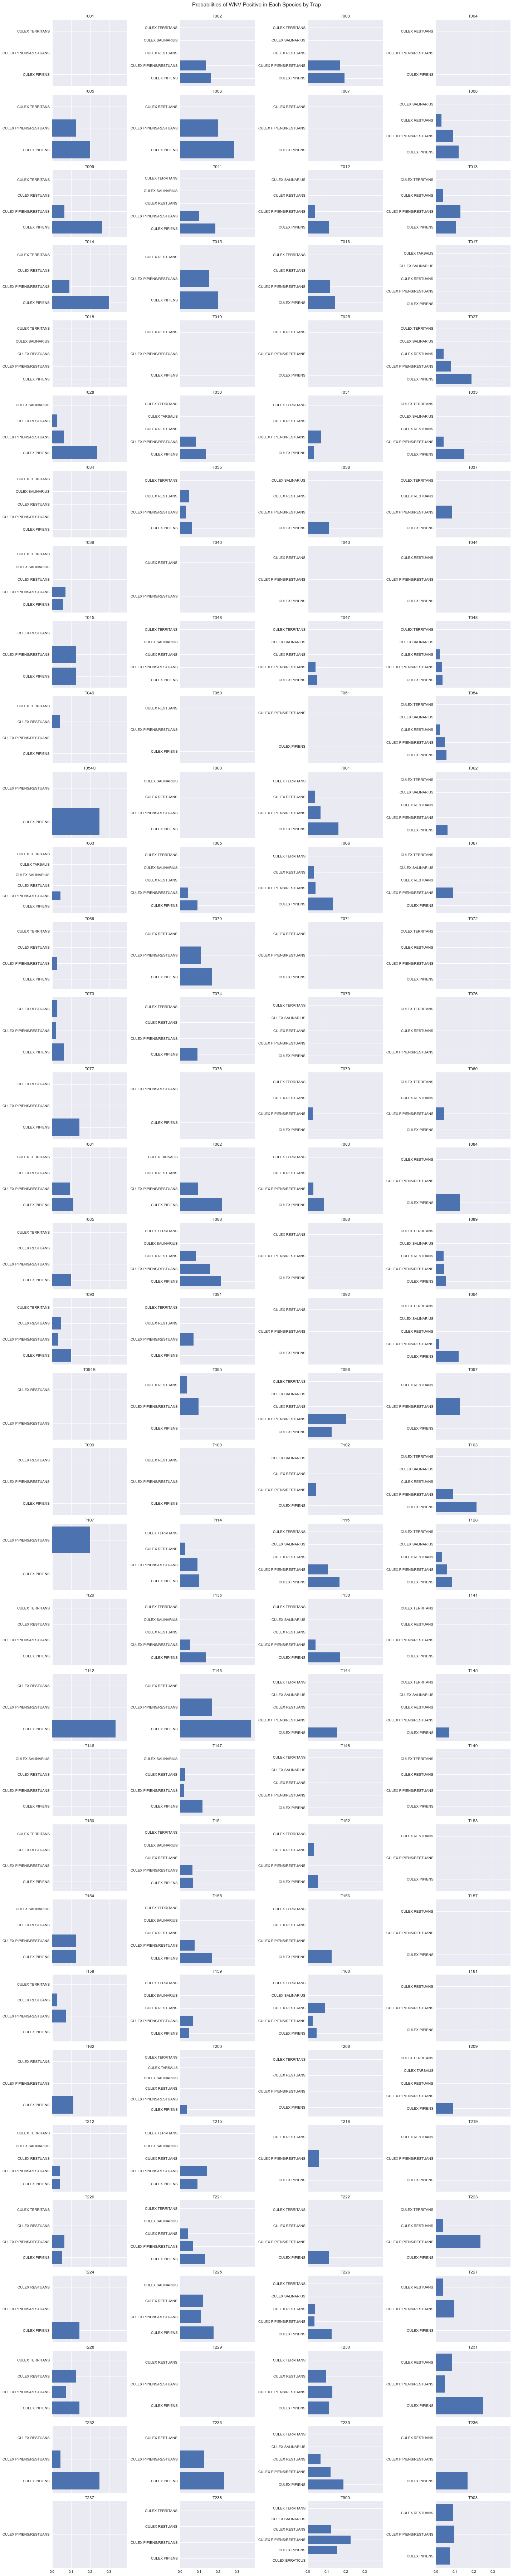

In [42]:
# grabs the name of the blocks
traps = list(combined_df['Trap'].unique())
traps.sort()

# find the probability of each species getting the WNV per trap
proba_trap = combined_df.groupby(['Trap','Species'], sort=True).mean()['WnvPresent']

fig, ax = plt.subplots(nrows = 34, ncols = 4, figsize= (20,100), sharex=True)
ax = ax.ravel()
plt.suptitle('Probabilities of WNV Positive in Each Species by Trap', x=0.5, y = 0.99999, size=15)

for i, t in enumerate(traps):
    ax[i].barh(proba_trap[t].index, proba_trap[t])
    ax[i].set_title(t)
    
plt.tight_layout(1.0)

This serves as a good general indicator for colleagues to dive deeper into certain traps if they wish to. From there, further EDA can be done on each traps if needed.

## Examining Relationship Between Weather and Number of Mosquito

Since the number of mosquitos also influence the probability of being WNV+, we will be examining both of their correlation to weather here.

In [43]:
# look at the correlation
combined_df.corr()['NumMosquitos'].sort_values(ascending=False)

NumMosquitos       1.000000
Tmin               0.067446
Cool               0.066469
Tavg               0.066001
WetBulb            0.064436
Tmax               0.057492
DewPoint           0.056375
WnvPresent         0.055553
Sunset             0.033898
Day                0.002205
AvgSpeed           0.000169
Longitude         -0.000630
PrecipTotal       -0.005065
ResultSpeed       -0.006364
Week              -0.009209
Month             -0.009912
StnPressure       -0.012046
Station           -0.012192
ResultDir         -0.013644
SeaLevel          -0.015340
Sunrise           -0.018858
Year              -0.022025
Heat              -0.042059
Latitude          -0.062888
Block             -0.079378
AddressAccuracy   -0.098224
Name: NumMosquitos, dtype: float64

We will examine the few interesting features which has high correlation with number of mosquitos and the probability of WNV positive.

**Relationship Between Temperature and Number of Mosquito, Presented by Months and Years**

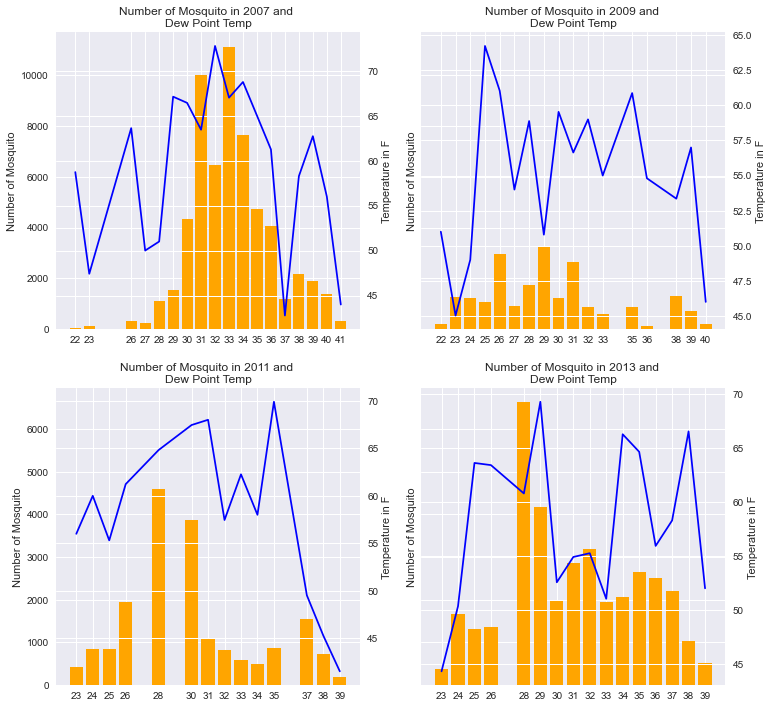

In [44]:
# total number of mosquitos per week by year
total_mosquito = total_mosquito = combined_df.groupby(['Year','Week']).sum()['NumMosquitos']

# average dewpoint
# use lowest because it seems like a big determinant
temp_weekly = combined_df.groupby(['Year','Week']).mean()['DewPoint']
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (12,12), sharey='row')
ax = ax.ravel()

for n, year in enumerate(combined_df['Year'].unique()):
    ax[n].bar(total_mosquito[year].index, list(total_mosquito[year]), color = 'orange')
    ax2 = ax[n].twinx()
    ax2.plot(temp_weekly[year], c = 'b')
    ax2.set_ylabel('Temperature in F')
    ax[n].set_title(f'Number of Mosquito in {year} and \nDew Point Temp')
    ax[n].set_xticks(total_mosquito[year].index)
    ax[n].set_ylabel('Number of Mosquito')

**Observations are**:
- The higher the minimum temperature, the higher the number of mosquitoes observed in that month
- The month of July-August seems to have the most number of mosquitoes

**Relationship Between Sunrise/Sunset and Number of Mosquitos**

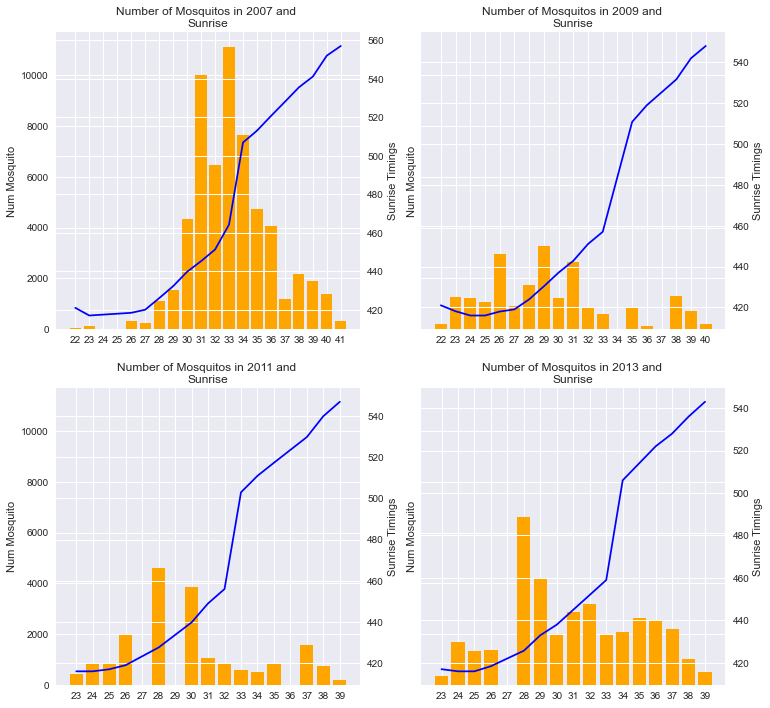

In [45]:
sunrise_weekly = combined_df.groupby(['Year','Week']).mean()['Sunrise']
mosq = combined_df.groupby(['Year', 'Week'])['NumMosquitos'].sum()


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (12,12), sharey='all')
ax = ax.ravel()

for n, year in enumerate(combined_df['Year'].unique()):
    ax[n].bar(mosq[year].index, list(mosq[year]), color = 'orange')
    ax2 = ax[n].twinx()
    ax2.plot(sunrise_weekly[year], c = 'b')
    ax2.set_ylabel('Sunrise Timings')
    ax[n].set_title(f'Number of Mosquitos in {year} and \nSunrise')
    min_x = min(combined_df.groupby('Year')['Week'].unique()[year])
    max_x = max(combined_df.groupby('Year')['Week'].unique()[year])
    ax[n].set_xticks(range(min_x, max_x+1))
    ax[n].set_ylabel('Num Mosquito')

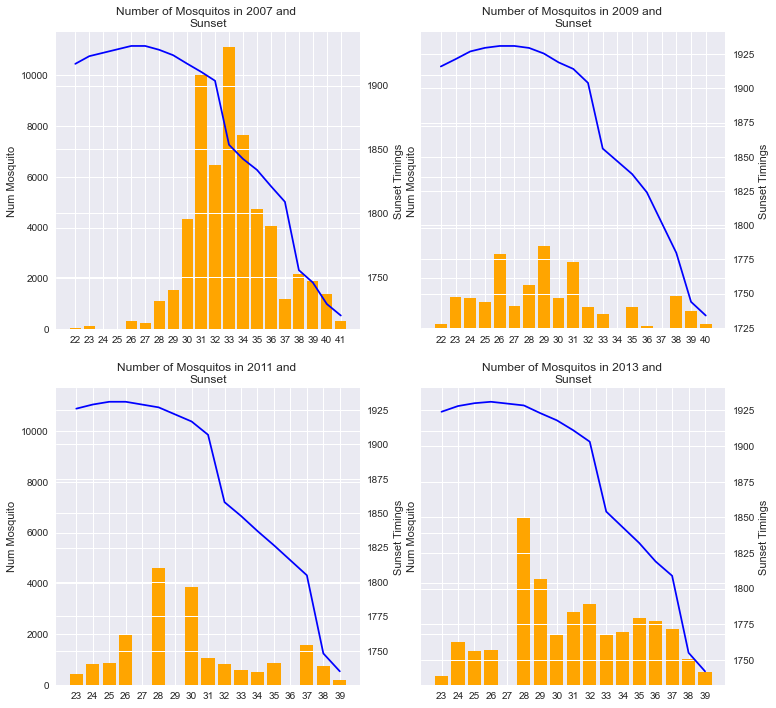

In [46]:
sunset_weekly = combined_df.groupby(['Year','Week']).mean()['Sunset']
mosq = combined_df.groupby(['Year', 'Week'])['NumMosquitos'].sum()


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (12,12), sharey='all')
ax = ax.ravel()

for n, year in enumerate(combined_df['Year'].unique()):
    ax[n].bar(mosq[year].index, list(mosq[year]), color = 'orange')
    ax2 = ax[n].twinx()
    ax2.plot(sunset_weekly[year], c = 'b')
    ax2.set_ylabel('Sunset Timings')
    ax[n].set_title(f'Number of Mosquitos in {year} and \nSunset')
    min_x = min(combined_df.groupby('Year')['Week'].unique()[year])
    max_x = max(combined_df.groupby('Year')['Week'].unique()[year])
    ax[n].set_xticks(range(min_x, max_x+1))
    ax[n].set_ylabel('Num Mosquito')

It seems that sunrise and sunset timings follows the trend of number of mosquitos. Towards winter where the days are shorter, and the night longer, the number of mosquito start to decline. On the other hand, during summer, there is a tendency of more mosquitos.

**Relationship Between Precipitation and Number of Mosquitos**

In [47]:
# average precipitation by month
precip_monthly = combined_df.groupby(['Year','Week']).mean()['PrecipTotal']

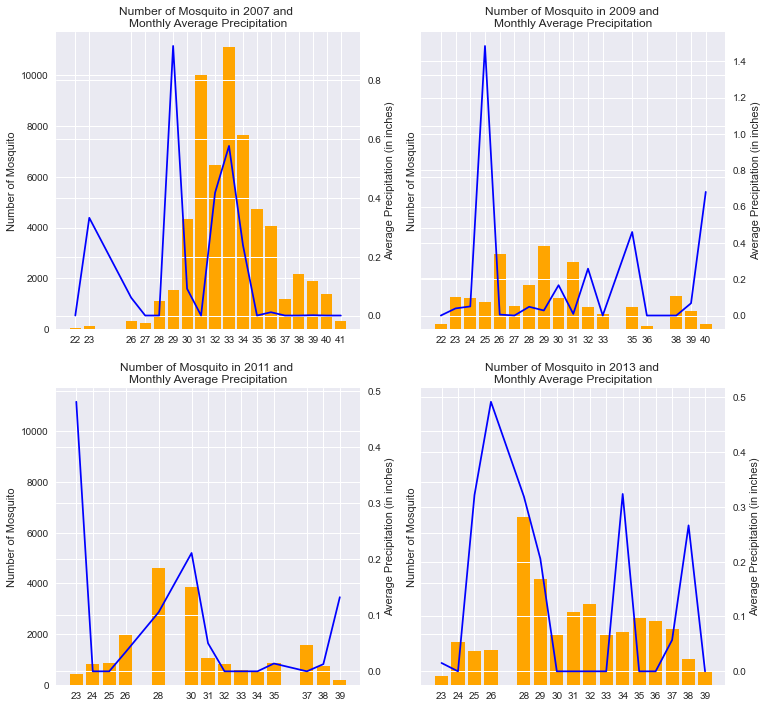

In [48]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (12,12), sharey='all')
ax = ax.ravel()

for n, year in enumerate(combined_df['Year'].unique()):
    ax[n].bar(total_mosquito[year].index, list(total_mosquito[year]), color = 'orange')
    ax2 = ax[n].twinx()
    ax2.plot(precip_monthly[year], c = 'b')
    ax2.set_ylabel('Average Precipitation (in inches)')
    ax[n].set_title(f'Number of Mosquito in {year} and \nMonthly Average Precipitation')
    ax[n].set_xticks(total_mosquito[year].index)
    ax[n].set_ylabel('Number of Mosquito')

- There seems to be some trend between precipitation and the number of mosquitos. However, due to missing data from rainfall, it is difficult to know for sure.

**Relationship Between Windspeed and Number of Mosquitos**

In [49]:
speed_monthly = combined_df.groupby(['Year','Month']).mean()['ResultSpeed']
total_mosquito = total_mosquito = combined_df.groupby(['Year','Month']).sum()['NumMosquitos']

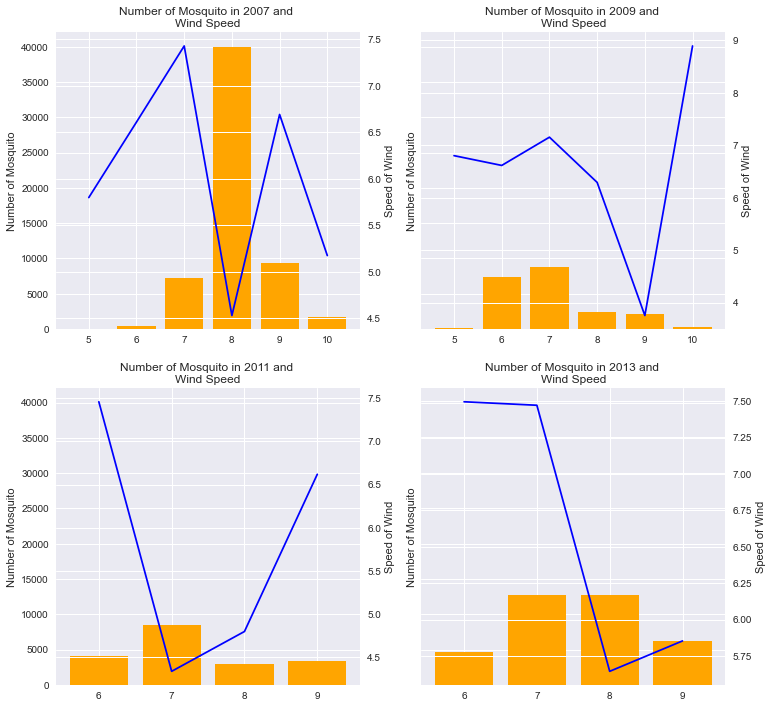

In [50]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (12,12), sharey='all')
ax = ax.ravel()

for n, year in enumerate(combined_df['Year'].unique()):
    ax[n].bar(total_mosquito[year].index, list(total_mosquito[year]), color = 'orange')
    ax2 = ax[n].twinx()
    ax2.plot(speed_monthly[year], c = 'b')
    ax2.set_ylabel('Speed of Wind')
    ax[n].set_title(f'Number of Mosquito in {year} and \nWind Speed')
    ax[n].set_xticks(total_mosquito[year].index)
    ax[n].set_ylabel('Number of Mosquito')

**Observations:**
- Seems like windspeed does have some influence over the number of mosquitos but not all the time. It is too difficult to conclude that there is a trend as it is inconsistent

**Relationship Between Windspeed and Number of Pressue**

In [51]:
stnpressure_monthly = combined_df.groupby(['Year','Month']).mean()['StnPressure']

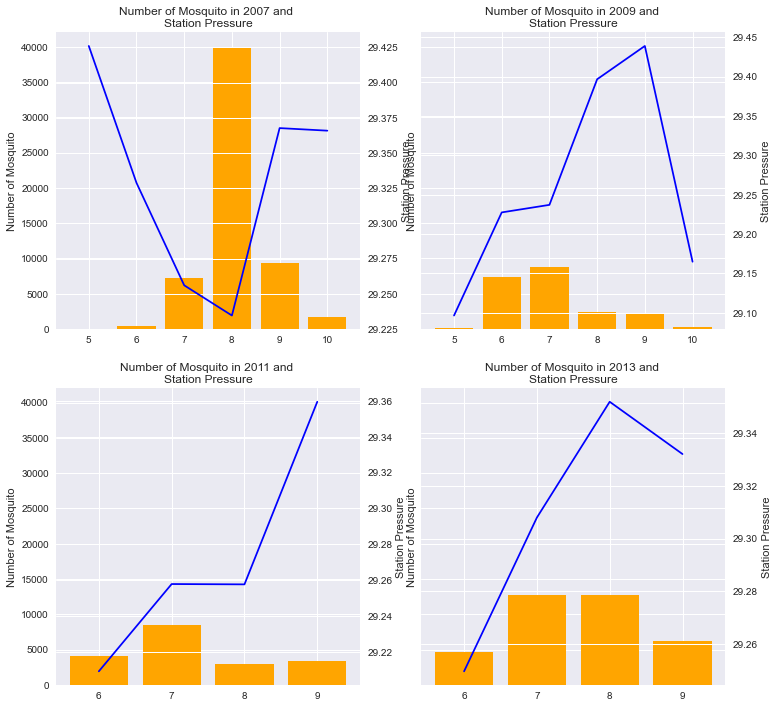

In [52]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (12,12), sharey='all')
ax = ax.ravel()

for n, year in enumerate(combined_df['Year'].unique()):
    ax[n].bar(total_mosquito[year].index, list(total_mosquito[year]), color = 'orange')
    ax2 = ax[n].twinx()
    ax2.plot(stnpressure_monthly[year], c = 'b')
    ax2.set_ylabel('Station Pressure')
    ax[n].set_title(f'Number of Mosquito in {year} and \nStation Pressure')
    ax[n].set_xticks(total_mosquito[year].index)
    ax[n].set_ylabel('Number of Mosquito')

**Observation**:
- It seems that for some period, the low pressure do contribute to the number of mosquitoes.
- However, the trend is also not consistent and it is difficult to know if there is a direct relationship.

## Examining Relationship Between Weather and WNV Positive

In [53]:
# examine correlation with WNV+
combined_df.corr()['WnvPresent'].sort_values(ascending=False)[1:]

Week               0.099187
Month              0.096551
Sunrise            0.096179
DewPoint           0.091116
WetBulb            0.088038
Tmin               0.078000
Tavg               0.071167
Cool               0.067013
Tmax               0.056592
NumMosquitos       0.055553
Year               0.042496
Latitude           0.030907
PrecipTotal        0.013674
Block              0.011303
AddressAccuracy    0.007886
SeaLevel           0.005737
Day                0.003381
ResultDir          0.001661
StnPressure       -0.007956
AvgSpeed          -0.035600
ResultSpeed       -0.050190
Heat              -0.055015
Sunset            -0.060140
Station           -0.065179
Longitude         -0.074075
Name: WnvPresent, dtype: float64

**Relationship Between Dew Point Temperature and WNV Positive by Weeks**

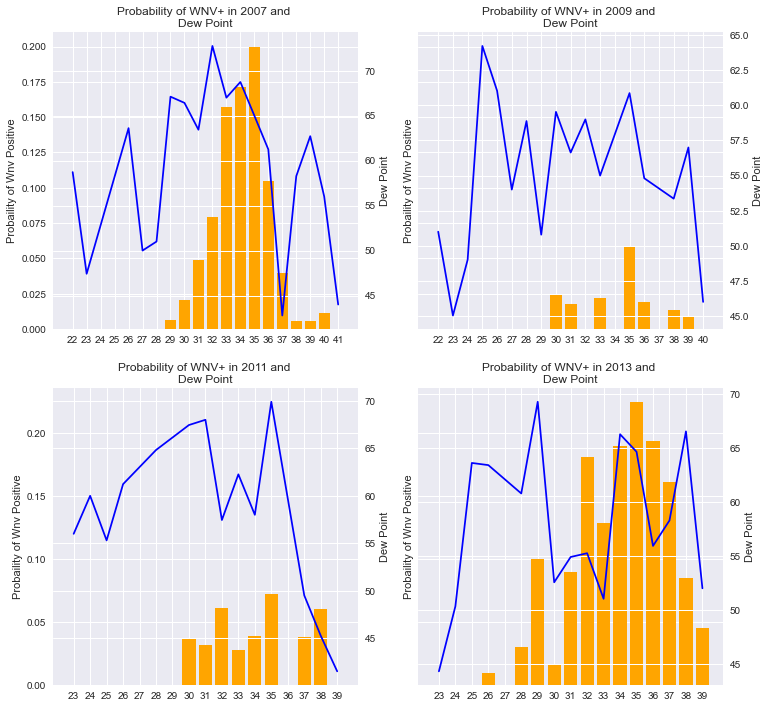

In [54]:
# create weekly dew point temperature
dewpoint_weekly = combined_df.groupby(['Year','Week']).mean()['DewPoint']

# create wnv probability by weeks
wnv_proba_weeks = combined_df.groupby(['Year', 'Week'])['WnvPresent'].mean()


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (12,12), sharey='row')
ax = ax.ravel()

for n, year in enumerate(combined_df['Year'].unique()):
    ax[n].bar(wnv_proba_weeks[year].index, list(wnv_proba_weeks[year]), color = 'orange')
    ax2 = ax[n].twinx()
    ax2.plot(dewpoint_weekly[year], c = 'b')
    ax2.set_ylabel('Dew Point')
    ax[n].set_title(f'Probability of WNV+ in {year} and \nDew Point')
    min_x = min(combined_df.groupby('Year')['Week'].unique()[year])
    max_x = max(combined_df.groupby('Year')['Week'].unique()[year])
    ax[n].set_xticks(range(min_x, max_x+1))
    ax[n].set_ylabel('Probaility of Wnv Positive')

We are able to see that if we plot weekly graphs with average dew point, there is a trend that dew point follows the probability of WNV being present. The higher the dew point, the higher the moisture in the air.

This could an indicator that humidity and temperature are important factors in influencing the activity of WNV+ mosquitos.

**Relationship Between Sunrise & Sunset and WNN Positive by Weeks**

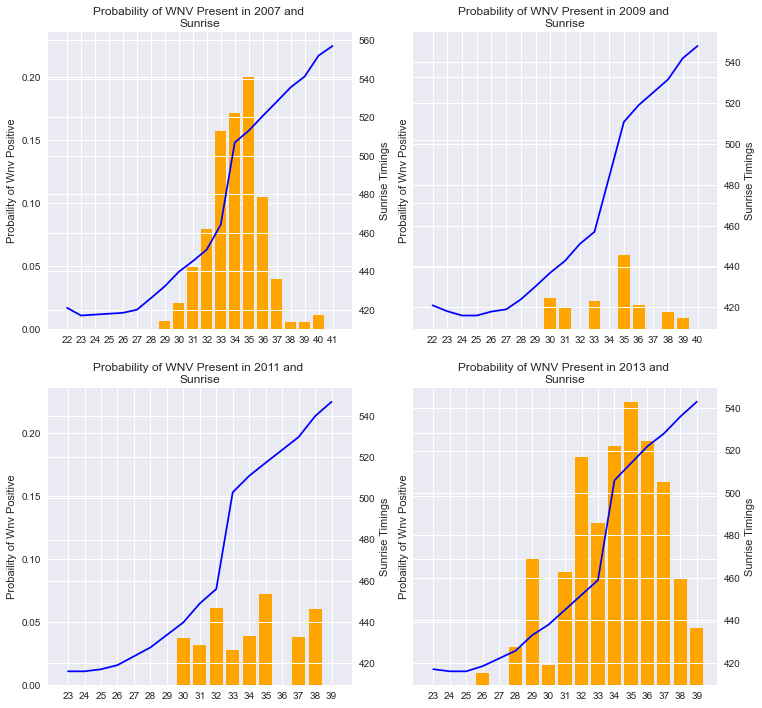

In [55]:
# create a list with average weekly sunrise timing

sunrise_weekly = combined_df.groupby(['Year','Week']).mean()['Sunrise']
wnv_proba_weeks = combined_df.groupby(['Year', 'Week'])['WnvPresent'].mean()


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (12,12), sharey='all')
ax = ax.ravel()

for n, year in enumerate(combined_df['Year'].unique()):
    ax[n].bar(wnv_proba_weeks[year].index, list(wnv_proba_weeks[year]), color = 'orange')
    ax2 = ax[n].twinx()
    ax2.plot(sunrise_weekly[year], c = 'b')
    ax2.set_ylabel('Sunrise Timings')
    ax[n].set_title(f'Probability of WNV Present in {year} and \nSunrise')
    min_x = min(combined_df.groupby('Year')['Week'].unique()[year])
    max_x = max(combined_df.groupby('Year')['Week'].unique()[year])
    ax[n].set_xticks(range(min_x, max_x+1))
    ax[n].set_ylabel('Probaility of Wnv Positive')

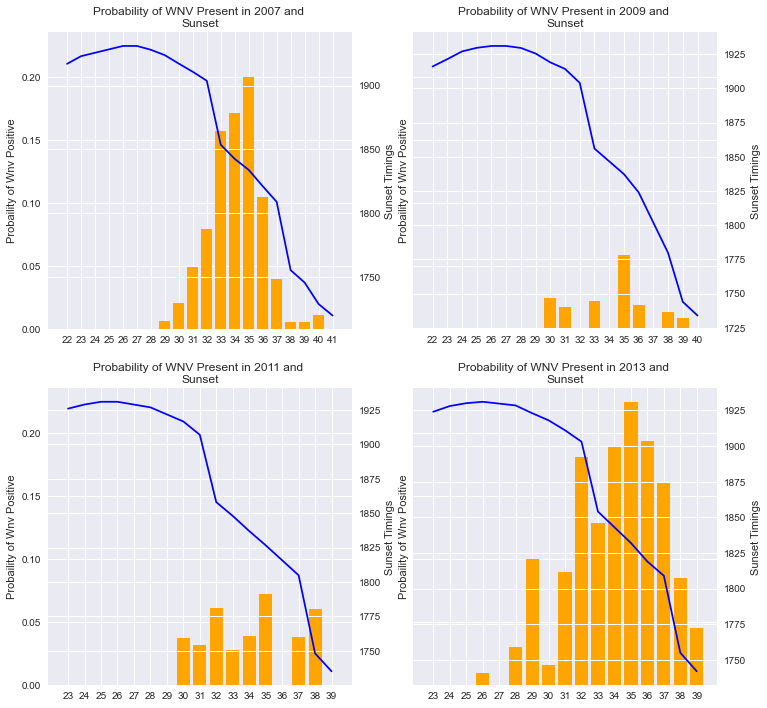

In [56]:
# create a list with average weekly sunset timing
sunset_weekly = combined_df.groupby(['Year','Week']).mean()['Sunset']
wnv_proba_weeks = combined_df.groupby(['Year', 'Week'])['WnvPresent'].mean()


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (12,12), sharey='all')
ax = ax.ravel()

for n, year in enumerate(combined_df['Year'].unique()):
    ax[n].bar(wnv_proba_weeks[year].index, list(wnv_proba_weeks[year]), color = 'orange')
    ax2 = ax[n].twinx()
    ax2.plot(sunset_weekly[year], c = 'b')
    ax2.set_ylabel('Sunset Timings')
    ax[n].set_title(f'Probability of WNV Present in {year} and \nSunset')
    min_x = min(combined_df.groupby('Year')['Week'].unique()[year])
    max_x = max(combined_df.groupby('Year')['Week'].unique()[year])
    ax[n].set_xticks(range(min_x, max_x+1))
    ax[n].set_ylabel('Probaility of Wnv Positive')

**Observation:**

As with seasons, the sunrise and sunset timings share an inverse relationship where whenever the sun rises early, the sun sets later. Towards the end of year (winter), the sun rises later and sets earlier. 

From the graphs, it is apparent that there is a sweet spot between week 30 to 40 where there is an increased probability of WNV positive.

**Summary Conclusion for Weather**

- Most of the features are highly collinear. For example, lowest temperature, highest temperature, Dew point, wetbulb, Heat and Cool are highly collinear. This is the same for wind and pressure indicators.

- Temperature-related features are directly correlated to the number of mosquitos and them carrying the virus. The higher the temperature, the more the number of mosquitos and the probability of them carrying the virus.

- Sunrise and Sunset also affects the probability of mosquitoes carrying WNV.

In [57]:
combined_df.to_csv('../datasets/cleaned_datasets/combined_train_cleaned.csv')

**Next notebook: [04a_Engineer_Weather_data](4a_Engineer_Weather_data.ipynb)**